In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

2*. 	Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. 
	Размер подвыборки принять равным 0.5. 
	Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [7]:
# 2. Так как gb - стохастический, количество объектов в батче должно быть = 1
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    test_errors = []
        
    n_test = X_test.shape[0]
    n_batch_test = n_test // qty_in_batch
    if n_test % qty_in_batch != 0:
        n_batch_test += 1
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
                
        for b in range(n_batch_test):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            
            X_tmp_test = X_test[start_ : end_]
            y_tmp_test = y_test[start_ : end_]
            
            if len(trees) == 0:
                tree.fit(X_tmp_test, y_tmp_test)
                test_errors.append([i, mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta))])
                
            else:
                target = gb_predict(X_tmp_test, trees, coefs, eta)
                tree.fit(X_tmp_test, bias(y_tmp_test, target))
                test_errors.append([i, mean_squared_error(y_tmp_test, gb_predict(X_tmp_test, trees, coefs, eta))])
                
        trees.append(tree)
    
    return np.array(test_errors)

In [8]:
def get_error_plot(test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
#     plt.xlim(0, n_trees)
#     plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(test_err[:,0], test_err[0,1], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [9]:
n_trees = 40
eta = 2e-1
coefs = [1]*n_trees
max_depth = 1

In [10]:
test_1 = gb_fit(
    n_trees=n_trees, 
    max_depth=max_depth, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test, 
    coefs=coefs, 
    eta=eta, 
    qty_in_batch=2
)

In [11]:
test_2 = gb_fit(
    n_trees=n_trees, 
    max_depth=max_depth, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test, 
    coefs=[1]*n_trees, 
    eta=eta, 
    qty_in_batch=4
)

In [12]:
test_3 = gb_fit(
    n_trees=n_trees, 
    max_depth=max_depth, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test, 
    coefs=[1]*n_trees, 
    eta=eta, 
    qty_in_batch=8
)

Резульататы 1й выборки: 0.00035251359640860213
Резульататы 2й выборки: 0.0014344626314510883
Резульататы 3й выборки: 0.3628673320138744


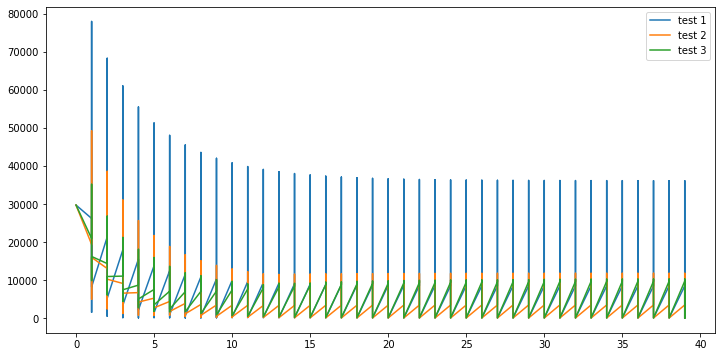

In [13]:
print(f'Резульататы 1й выборки: {test_1[-1, 1]}')
print(f'Резульататы 2й выборки: {test_2[-1, 1]}')
print(f'Резульататы 3й выборки: {test_3[-1, 1]}')

plt.figure(figsize=(12, 6))
plt.plot(test_1[:,0], test_1[:,1], label='test 1')
plt.plot(test_2[:,0], test_2[:,1], label='test 2')
plt.plot(test_3[:,0], test_3[:,1], label='test 3')
plt.legend(loc='upper right')
plt.show()

На этом графике видно, что чем больше объектов в батче, тем __ниже__ разброс и __точность__